In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import files
uploaded = files.upload()
import io
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving cancer_patient_data_sets.csv to cancer_patient_data_sets (6).csv


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [19]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

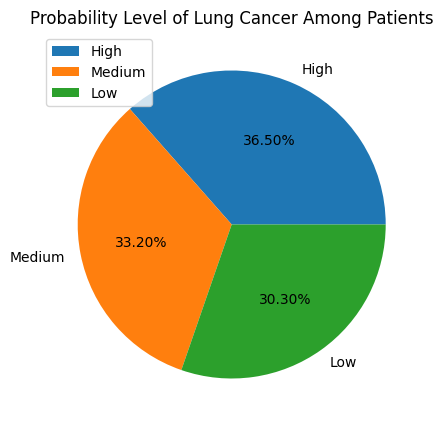

In [21]:
# Probability Level of Lung Cancer Among Patients

tdf=df['Level'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdf['count'],labels=tdf['Level'],autopct='%.2f%%')
plt.title('Probability Level of Lung Cancer Among Patients')
plt.legend(tdf['Level'])
plt.show()

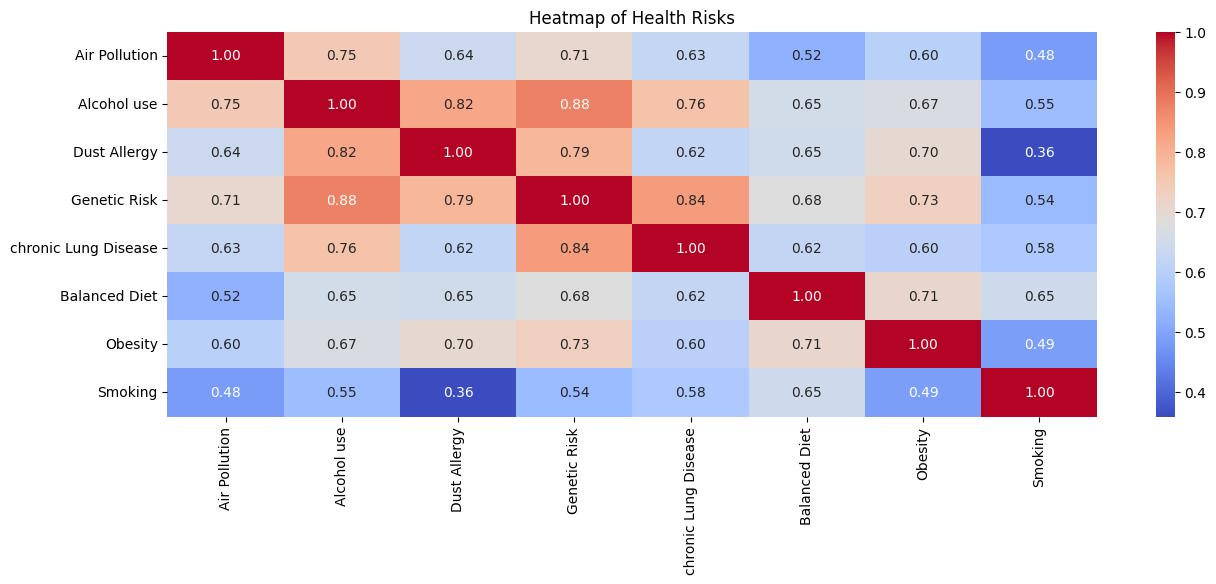

In [22]:
#Let us look how some of the Risk, Allergies and behavious are related to each other
corr=df[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
            'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Health Risks')
plt.show()

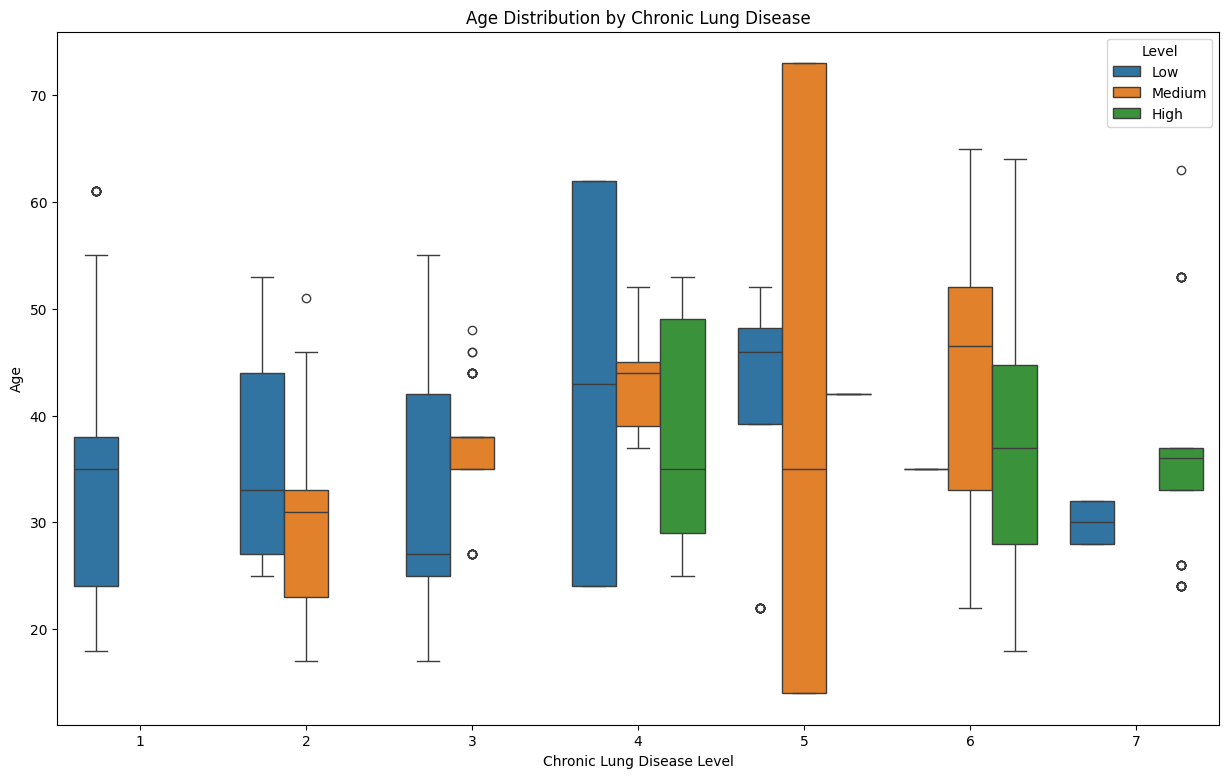

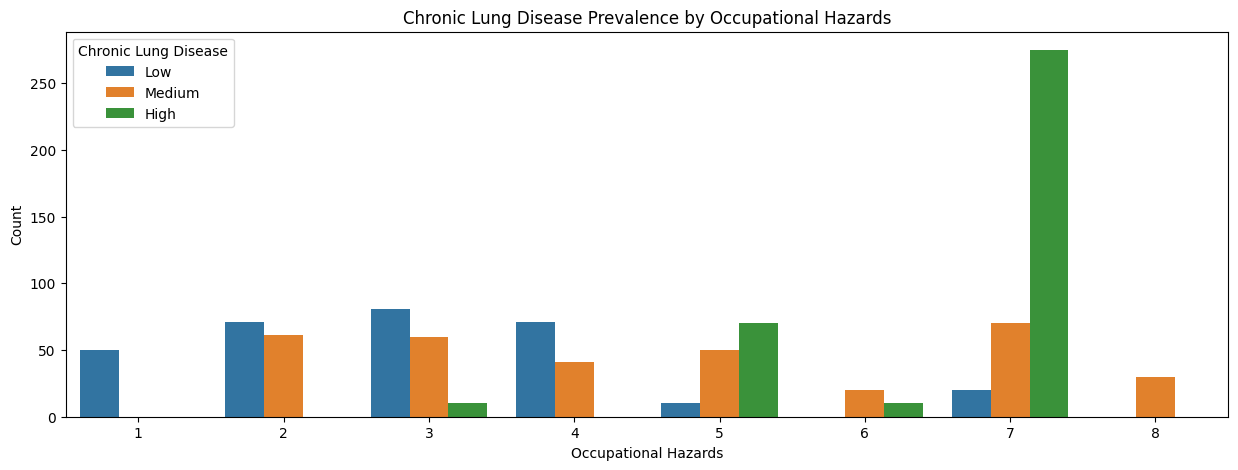

In [23]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=df,x='chronic Lung Disease',y='Age',hue='Level')
plt.title('Age Distribution by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease Level')
plt.ylabel('Age')
plt.show()
plt.figure(figsize=(15, 5))
sns.countplot(data=df,x='OccuPational Hazards',hue='Level')
plt.title('Chronic Lung Disease Prevalence by Occupational Hazards')
plt.xlabel('Occupational Hazards')
plt.ylabel('Count')
plt.legend(title='Chronic Lung Disease')
plt.show()

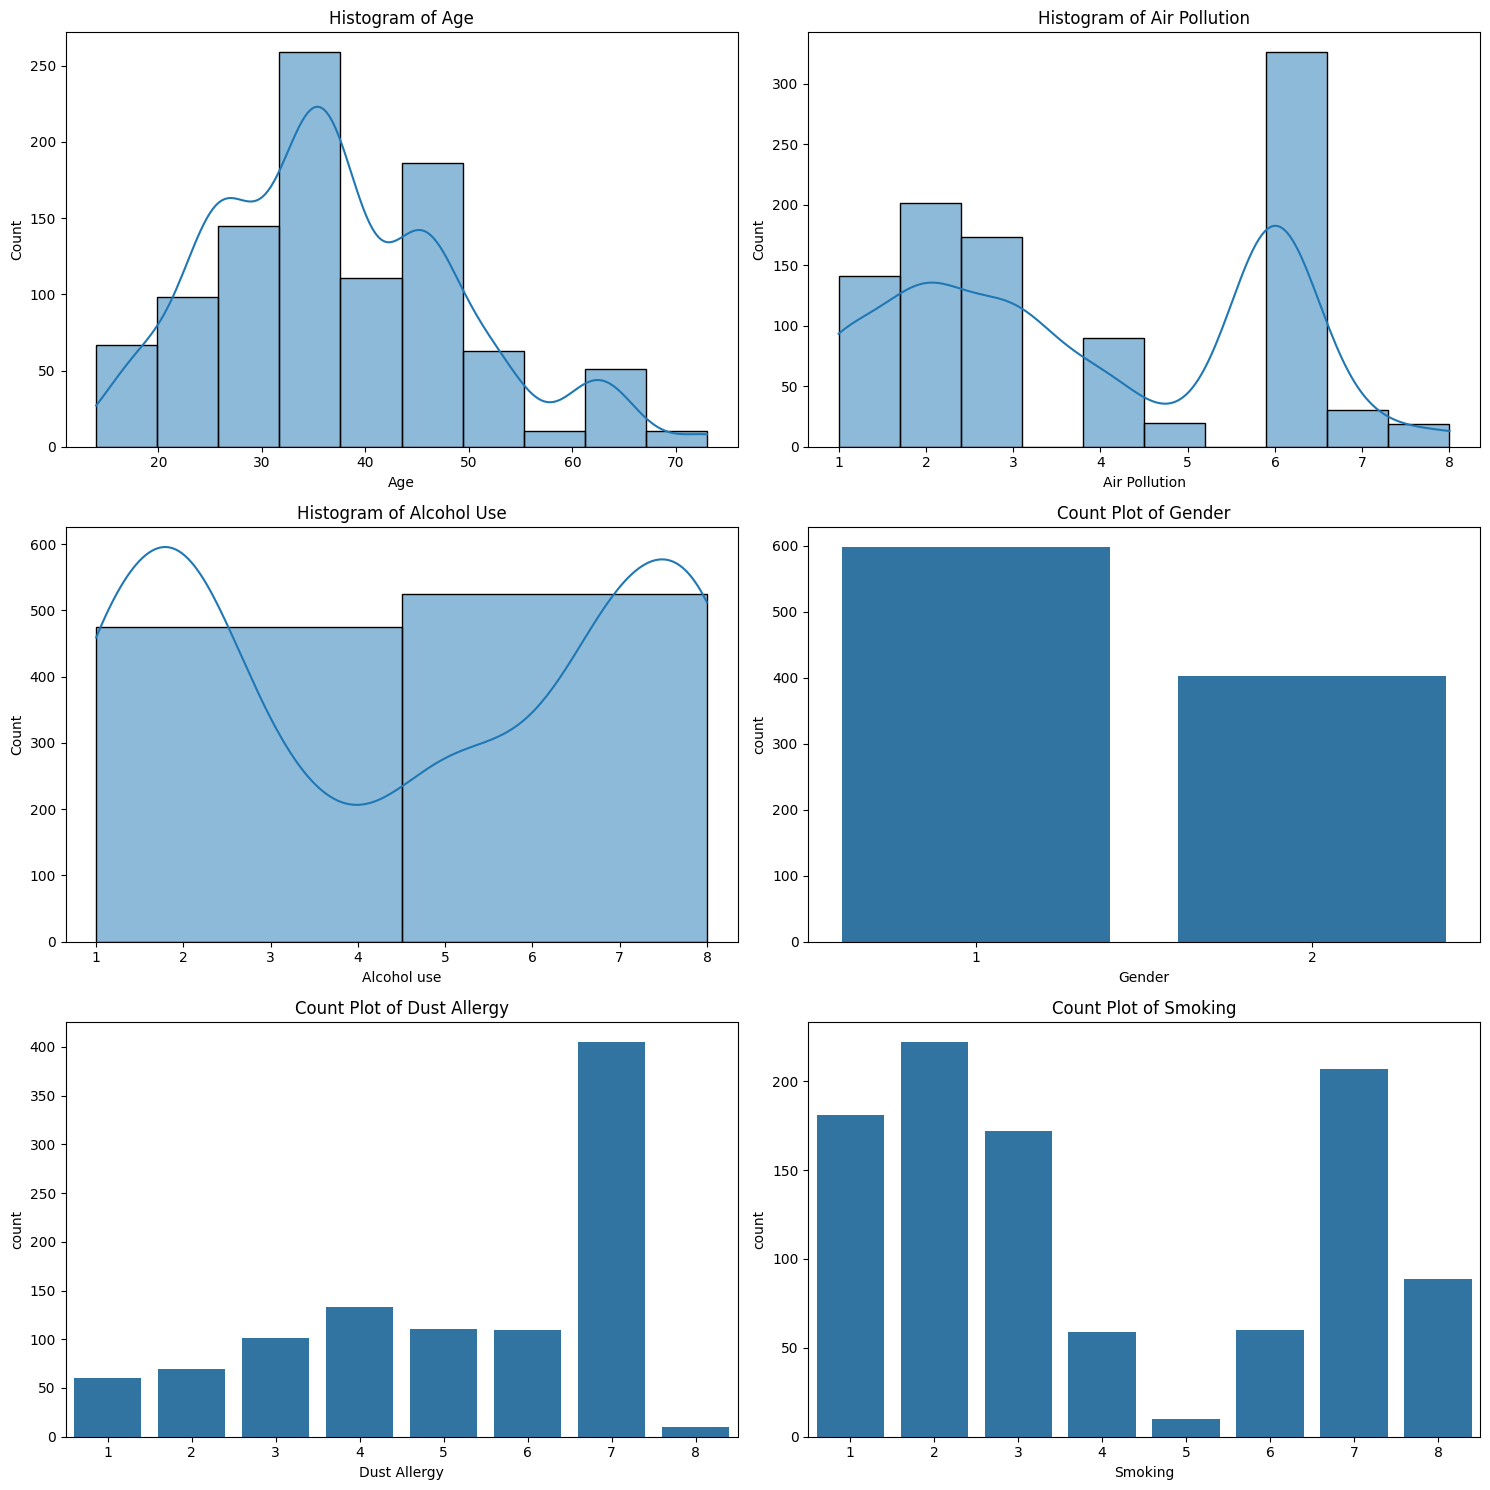

In [24]:
fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Age')
sns.histplot(df['Air Pollution'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Air Pollution')
sns.histplot(df['Alcohol use'], bins=2, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Alcohol Use')
sns.countplot(x='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count Plot of Gender')
sns.countplot(x='Dust Allergy', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Count Plot of Dust Allergy')
sns.countplot(x='Smoking', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Count Plot of Smoking')
plt.tight_layout()
plt.show()

In [25]:
# Data Processing
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

,0
index,False
Patient Id,False
Age,False
Gender,False
Air Pollution,False
Alcohol use,False
Dust Allergy,False
OccuPational Hazards,False
Genetic Risk,False
chronic Lung Disease,False


In [26]:
# Dropping Unwanted Column (Patient ID)
col=['index','Patient Id']
df.drop(columns=col,inplace=True,axis=1)

In [27]:
# Encodig the target column
df['Level']=df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

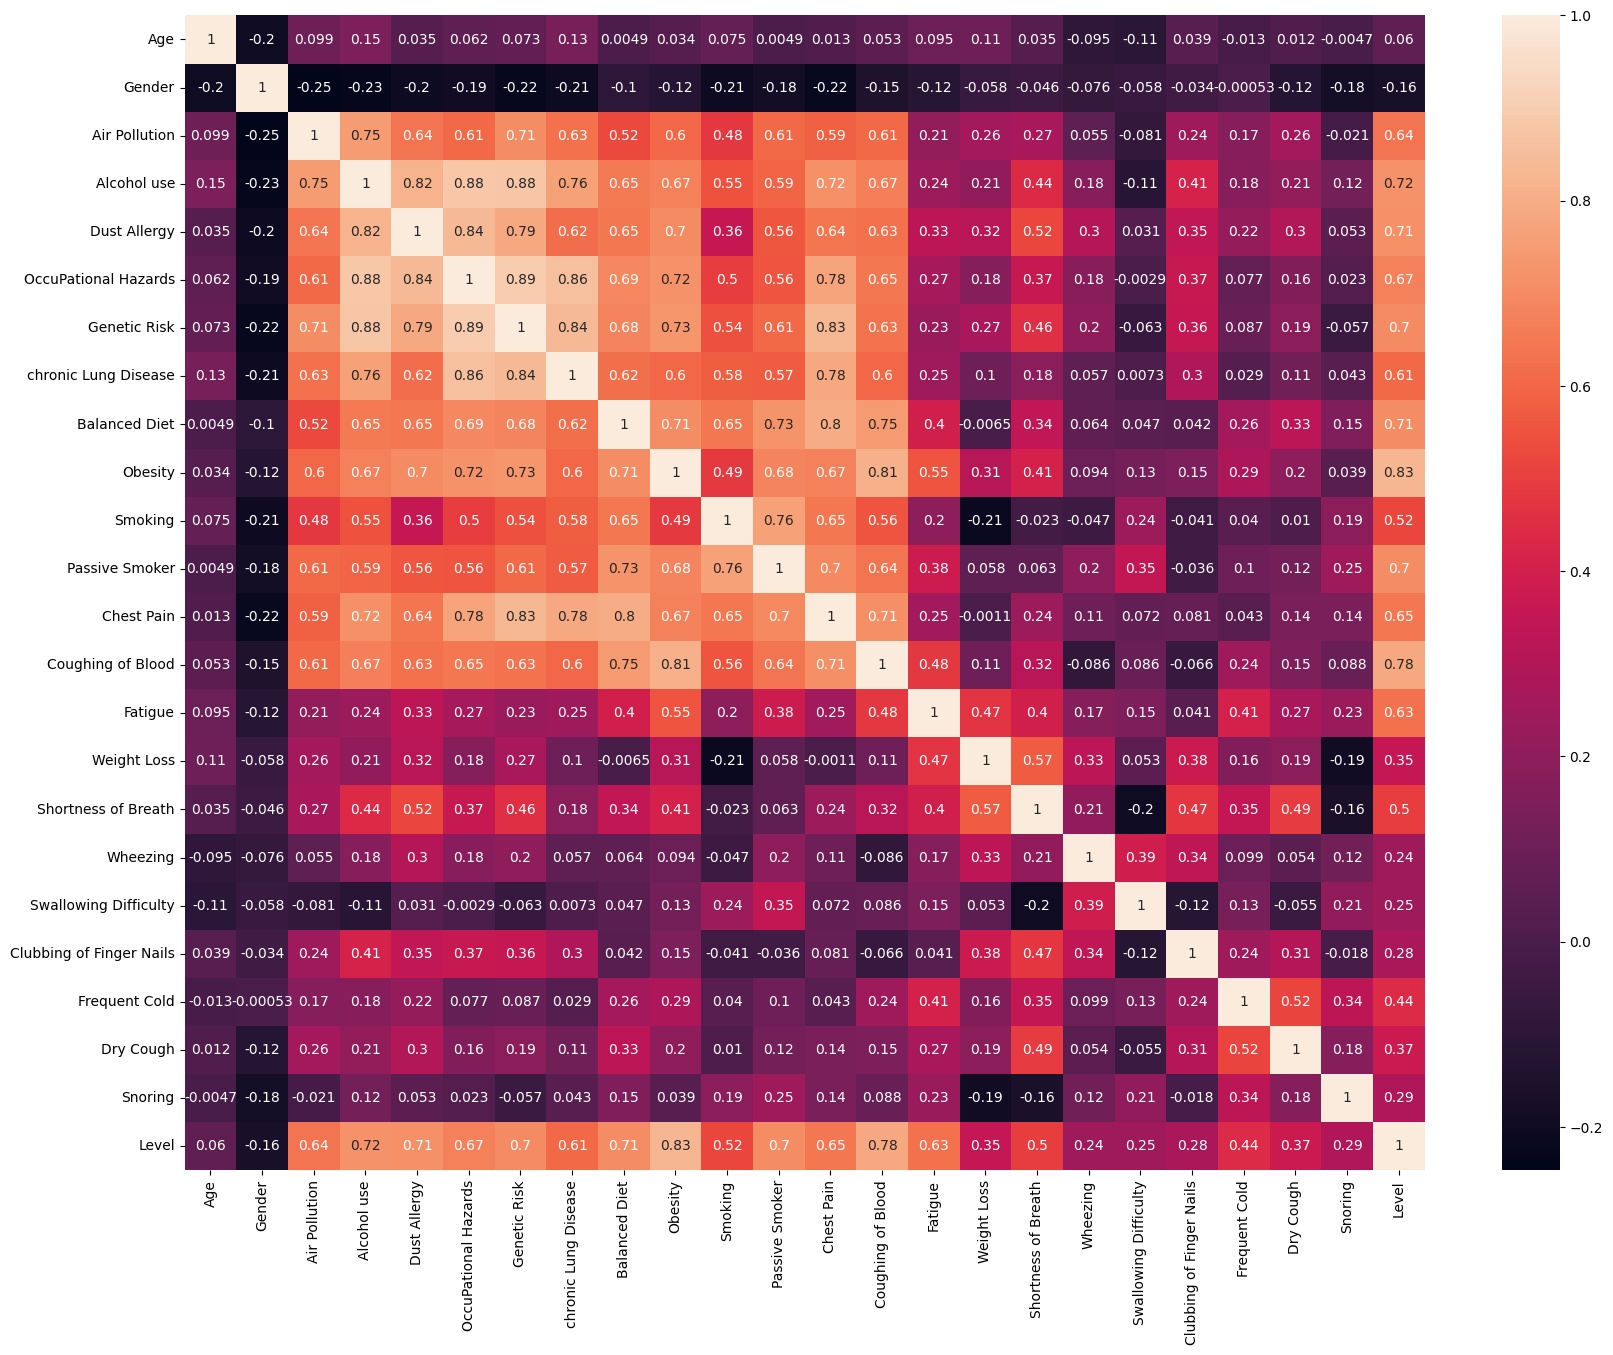

In [29]:
# Finding correlation between the features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cbar='plasma')
plt.show()

In [30]:
# Splitting the Target column from the original dataset
x=df.drop(columns='Level')
y=df['Level']

# Calculating Mutual Information for capturing both linear and non-linear relationship
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                     Feature  Mutual Information
0          Coughing of Blood            0.609903
1             Passive Smoker            0.593361
2                Alcohol use            0.547290
3                    Obesity            0.535453
4                   Wheezing            0.508408
5                 Chest Pain            0.502606
6              Balanced Diet            0.477184
7               Dust Allergy            0.460178
8        Shortness of Breath            0.417523
9              Air Pollution            0.407775
10      OccuPational Hazards            0.403873
11              Genetic Risk            0.400670
12                   Smoking            0.398688
13      chronic Lung Disease            0.394199
14                   Fatigue            0.386776
15                       Age            0.382507
16                 Dry Cough            0.257015
17             Frequent Cold            0.247236
18               Weight Loss            0.241070
19  Clubbing of Fing

In [31]:
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [32]:
# Regression Model
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [33]:
cm_t=[]
cm=[]

In [34]:
# K Nearest Neighbors
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,n_jobs=-1,random_state=20,scoring='accuracy',param_distributions=params,cv=10)
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_

{'n_neighbors': 6}
0.9973333333333333


In [35]:
#Predicting on the testing set
pred_t=nknn.predict(x_t)
pred=nknn.predict(x_te)
print('KNN Training Accuracy: ',accuracy_score(y_t,pred_t))
print('KNN Testing Accuracy: ',accuracy_score(y_te,pred))
print('\nClassification Report for KNN Classifier:\n\n ',classification_report(y_te,pred))
cmk_t=confusion_matrix(y_t,pred_t)
cm_t.append(cmk_t)
cmk=confusion_matrix(y_te,pred)
cm.append(cmk)

KNN Training Accuracy:  0.9973333333333333
KNN Testing Accuracy:  1.0

Classification Report for KNN Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [36]:
# Decision Tree Classifier
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=GridSearchCV(dt,param_grid=params,n_jobs=-1,scoring='accuracy',cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.0}
1.0


In [37]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)

params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,scoring='accuracy',random_state=42,n_jobs=-1,cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 48, 'min_samples_leaf': 9, 'max_features': None, 'criterion': 'gini'}
0.984


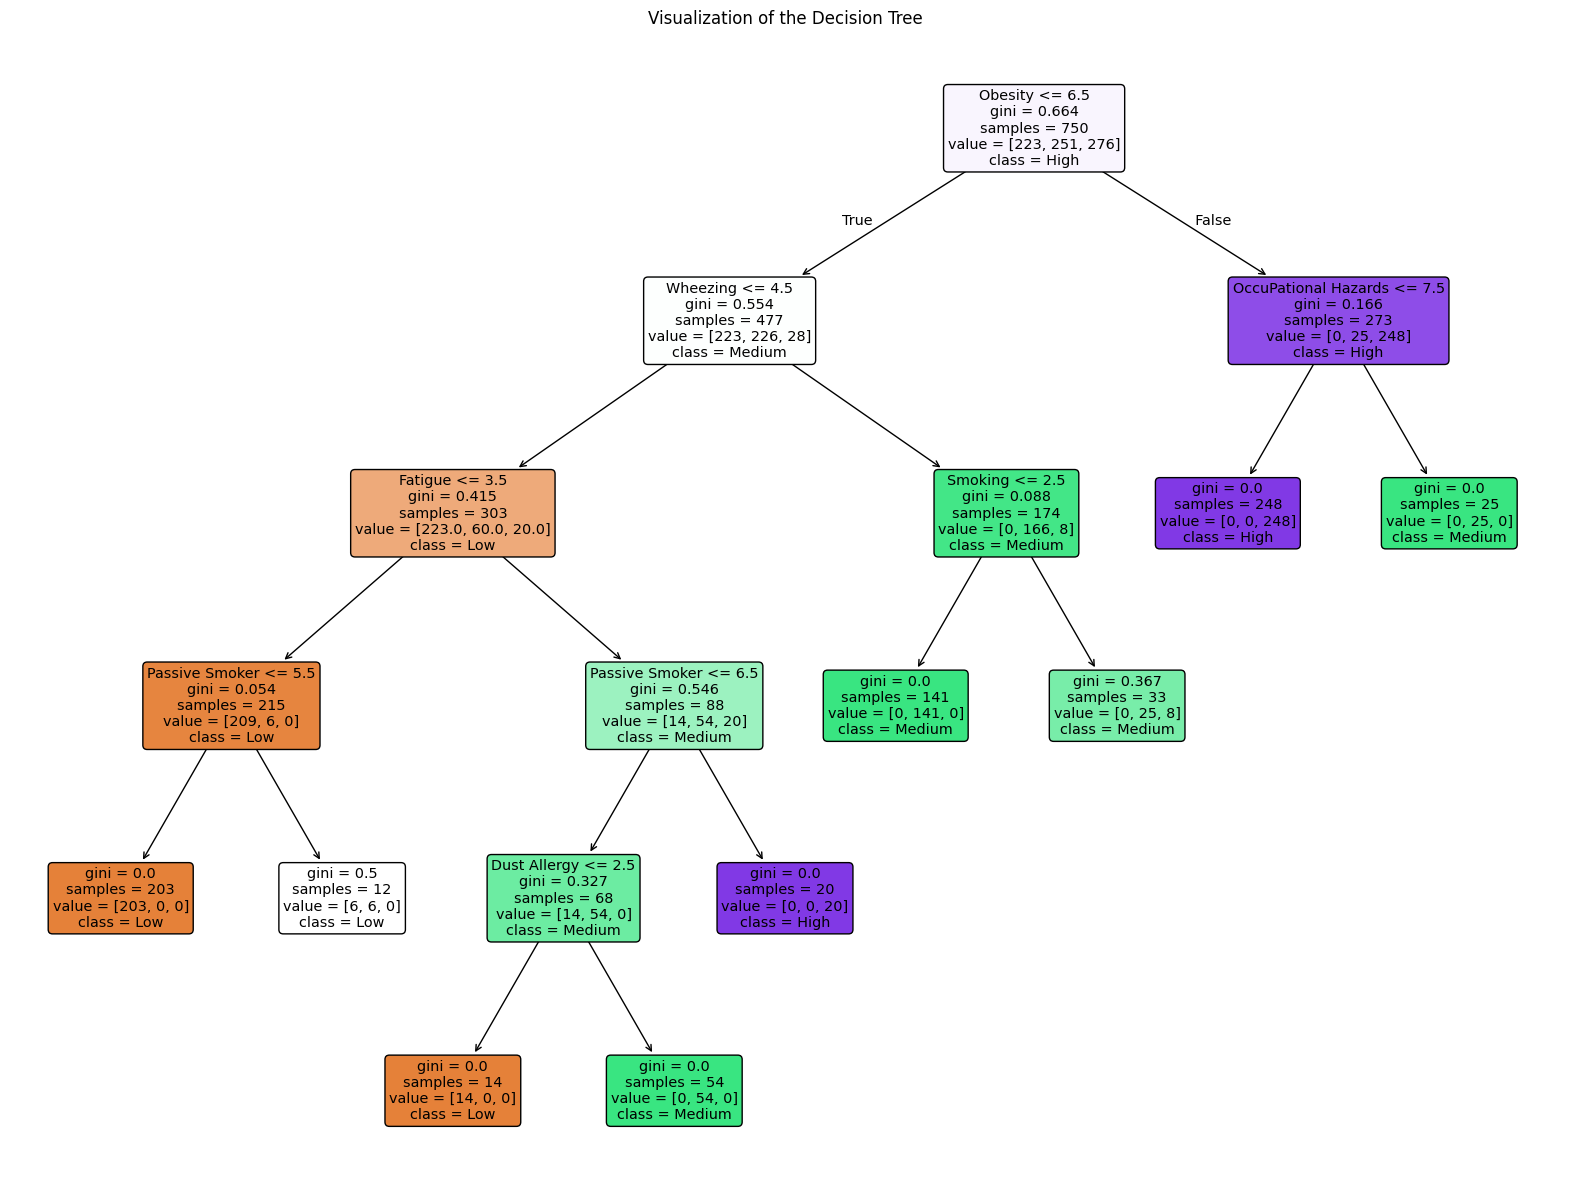

In [40]:
# Visualization of the Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(ndt,filled=True,feature_names=x_t.columns, class_names=['Low', 'Medium','High'],rounded=True)
plt.title('Visualization of the Decision Tree')
plt.show()

In [41]:
#Predicting on the testing set
pred1_t=ndt.predict(x_t)
pred1=ndt.predict(x_te)
print('Decision Tree Classifier Training Accuracy: ',accuracy_score(y_t,pred1_t))
print('Decision Tree Classifier Testing Accuracy: ',accuracy_score(y_te,pred1))
print('\nClassification Report for Decision Tree Classifier:\n\n ',classification_report(y_te,pred1))
cmdt_t=confusion_matrix(y_t,pred1_t)
cm_t.append(cmdt_t)
cmdt=confusion_matrix(y_te,pred1)
cm.append(cmdt)

Decision Tree Classifier Training Accuracy:  0.9813333333333333
Decision Tree Classifier Testing Accuracy:  0.976

Classification Report for Decision Tree Classifier:

                precision    recall  f1-score   support

           0       0.95      1.00      0.98        80
           1       0.97      0.95      0.96        81
           2       1.00      0.98      0.99        89

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [42]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

nrf = RandomizedSearchCV(rf, param_distributions=params, scoring='accuracy', random_state=42, n_jobs=-1, cv=10)
nrf.fit(x_t, y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf = nrf.best_estimator_

# Predicting on the testing set
pred2_t = nrf.predict(x_t)
pred2 = nrf.predict(x_te)
print('Random Forest Classifier Training Accuracy: ', accuracy_score(y_t, pred2_t))
print('Random Forest Classifier Testing Accuracy: ', accuracy_score(y_te, pred2))
print('\nClassification Report for Random Forest Classifier:\n\n ', classification_report(y_te, pred2))

cmrf_t = confusion_matrix(y_t, pred2_t)
cm_t.append(cmrf_t)
cmrf = confusion_matrix(y_te, pred2)
cm.append(cmrf)

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
1.0
Random Forest Classifier Training Accuracy:  1.0
Random Forest Classifier Testing Accuracy:  1.0

Classification Report for Random Forest Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [43]:
# AdaBoost Classifier
ab = AdaBoostClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 1]}

nab = RandomizedSearchCV(ab, param_distributions=params, scoring='accuracy', random_state=42, n_jobs=-1, cv=10)
nab.fit(x_t, y_t)
print(nab.best_params_)
print(nab.best_score_)
nab = nab.best_estimator_

# Predicting on the testing set
pred3_t = nab.predict(x_t)
pred3 = nab.predict(x_te)
print('AdaBoost Classifier Training Accuracy: ', accuracy_score(y_t, pred3_t))
print('AdaBoost Classifier Testing Accuracy: ', accuracy_score(y_te, pred3))
print('\nClassification Report for AdaBoost Classifier:\n\n ', classification_report(y_te, pred3))

cmab_t = confusion_matrix(y_t, pred3_t)
cm_t.append(cmab_t)
cmab = confusion_matrix(y_te, pred3)
cm.append(cmab)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'n_estimators': 200, 'learning_rate': 0.01}
0.9746666666666666
AdaBoost Classifier Training Accuracy:  0.9813333333333333
AdaBoost Classifier Testing Accuracy:  0.976

Classification Report for AdaBoost Classifier:

                precision    recall  f1-score   support

           0       1.00      0.93      0.96        80
           1       0.93      1.00      0.96        81
           2       1.00      1.00      1.00        89

    accuracy                           0.98       250
   macro avg       0.98      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



In [44]:
# Training and Testing Scores for all the Models

tdf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred_t),accuracy_score(y_t,pred1_t),accuracy_score(y_t,pred2_t),accuracy_score(y_t,pred3_t)],
                  'Training Precision':[precision_score(y_t,pred_t,average='macro'),precision_score(y_t,pred1_t,average='macro'),precision_score(y_t,pred2_t,average='macro'),precision_score(y_t,pred3_t,average='macro')],
                  'Training Recall':[recall_score(y_t,pred_t,average='macro'),recall_score(y_t,pred1_t,average='macro'),recall_score(y_t,pred2_t,average='macro'),recall_score(y_t,pred3_t,average='macro')],
                  'Training F1 Score':[f1_score(y_t,pred_t,average='macro'),f1_score(y_t,pred1_t,average='macro'),f1_score(y_t,pred2_t,average='macro'),f1_score(y_t,pred3_t,average='macro')]})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,KNN,0.997333,0.997365,0.997010,0.997176
1,Decision Tree Classifier,0.981333,0.980726,0.982370,0.981414
2,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
3,AdaBoost Classifier,0.981333,0.982390,0.979073,0.980154


In [45]:
tedf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1),accuracy_score(y_te,pred2),accuracy_score(y_te,pred3)],
                  'Testing Precision':[precision_score(y_te,pred,average='macro'),precision_score(y_te,pred1,average='macro'),precision_score(y_te,pred2,average='macro'),precision_score(y_te,pred3,average='macro')],
                  'Testing Recall':[recall_score(y_te,pred,average='macro'),recall_score(y_te,pred1,average='macro'),recall_score(y_te,pred2,average='macro'),recall_score(y_te,pred3,average='macro')],
                  'Testing F1 Score':[f1_score(y_te,pred,average='macro'),f1_score(y_te,pred1,average='macro'),f1_score(y_te,pred2,average='macro'),f1_score(y_te,pred3,average='macro')]})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,KNN,1.000,1.000000,1.000000,1.000000
1,Decision Tree Classifier,0.976,0.975688,0.976048,0.975582
2,Random Forest Classifier,1.000,1.000000,1.000000,1.000000
3,AdaBoost Classifier,0.976,0.977011,0.975000,0.975108


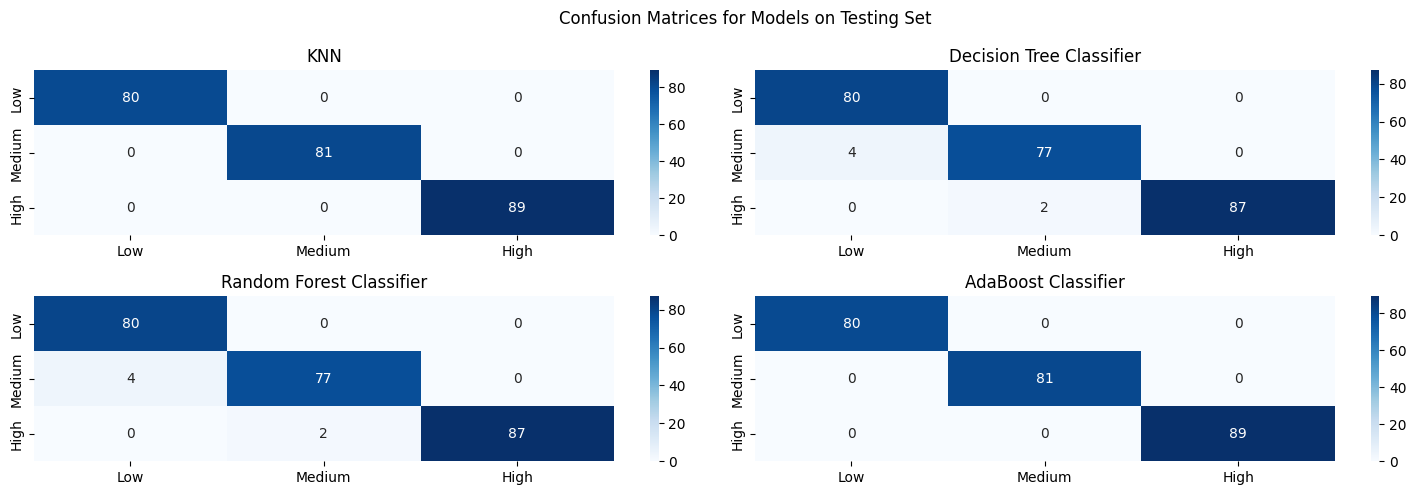

In [46]:
#Confusion Matrices for all the Models
mods = ['KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier']
labels = ['Low', 'Medium', 'High']
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
r = 0
c = 0

for i, mod in enumerate(mods):
    sns.heatmap(cm[i], annot=True, fmt='d', ax=ax[r][c], xticklabels=labels, yticklabels=labels, cmap='Blues')
    ax[r][c].set_title(mod)
    c += 1
    if c == 2:
        r += 1
        c = 0

plt.suptitle('Confusion Matrices for Models on Testing Set')
plt.tight_layout()
plt.show()